<a href="https://colab.research.google.com/github/sparta-13/BIKE-SHARING-DEMAND-PREDICTION/blob/main/Bike_Sharing_Demand_Prediction_Rishikesh_Damale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### **Date** : year-month-day
* ### **Rented Bike count** - Count of bikes rented at each hour
* ### **Hour** - Hour of The day
* ### **Temperature** - Temperature in Celsius
* ### **Humidity** - %
* ### **Windspeed** - m/s
* ### **Visibility** - 10m
* ### **Dew point temperature** - Celsius
* ### **Solar radiation** - MJ/m2
* ### **Rainfall** - mm
* ### **Snowfall** - cm
* ### **Seasons** - Winter, Spring, Summer, Autumn
* ### **Holiday** - Holiday/No holiday
* ### **Functional Day** - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Importing data visualization libraries.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing data manipulation libraries.
import pandas as pd
import numpy as np

# Datatime library for Date columns.
from datetime import datetime
import datetime as dt
from operator import itemgetter

# Importing preprocessing libraries. 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

# Importing various machine learning models.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


# Importing model selection libraries.
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Importing metrics libraries for model evaluation.
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

# Importing graphviz for visualizing decision trees.
import graphviz
import sklearn.tree as tree


import warnings
warnings.filterwarnings('ignore')



# Mounting the drive for importing the data

In [2]:
# Mounting the Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading the data from drive
rent_bike_df = pd.read_csv('/content/drive/MyDrive/SUPERVISED ML - Regression Project/BIKE SHARING DEMAND/SeoulBikeData.csv',encoding='latin')

# Data Summary

In [4]:
rent_bike_df.head(10)  # Printing the first 10 rows

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [5]:
rent_bike_df.tail(10) # Printing the last 10 rows.

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8750,30/11/2018,761,14,7.8,20,2.2,2000,-13.8,1.67,0.0,0.0,Autumn,No Holiday,Yes
8751,30/11/2018,768,15,7.0,20,3.3,1994,-14.4,1.21,0.0,0.0,Autumn,No Holiday,Yes
8752,30/11/2018,837,16,7.2,23,1.5,1945,-12.6,0.72,0.0,0.0,Autumn,No Holiday,Yes
8753,30/11/2018,1047,17,6.0,29,2.1,1877,-10.7,0.23,0.0,0.0,Autumn,No Holiday,Yes
8754,30/11/2018,1384,18,4.7,34,1.9,1661,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.00,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.00,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
# Checking the shape of the data
rent_bike_df.shape

(8760, 14)

This Dataset contains 8760 lines and 14 columns.

In a day we have 24 hours and we have 365 days a year so 365 multiplied by 24 = 8760, which represents the number of line in the dataset.














In [7]:
# Columns in the data
rent_bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [8]:
rent_bike_df.info() # Checking coloumn datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [9]:
# checking the description of the data
rent_bike_df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [10]:
# Unique values in each coloumn
rent_bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

# Checking missing values

In [11]:
# Checking for the null values in dataset
rent_bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [12]:
# Counting the total number of null values if any?
count =len(rent_bike_df[rent_bike_df.duplicated()])
print(f'The number of duplicate values in the data set is {count}')

The number of duplicate values in the data set is 0


as we can see from above codes the dataset doesn't have any missing values and duplicate values 

In [13]:
print(type(rent_bike_df['Date'][0])) # As Date column is in str format we need to convert it into date .

<class 'str'>


In [14]:
# Converting to date format..
rent_bike_df['Date'] = rent_bike_df['Date'].apply(lambda d: 
                                    dt.datetime.strptime(d,"%d/%m/%Y"))

In [15]:
print(type(rent_bike_df['Date'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [16]:
# Seperating year, month and day from Date column
rent_bike_df['Month'] = rent_bike_df['Date'].dt.month
rent_bike_df['Day'] = rent_bike_df['Date'].dt.day_name()

In [17]:
rent_bike_df.Day.value_counts()

Friday       1272
Saturday     1248
Sunday       1248
Monday       1248
Tuesday      1248
Wednesday    1248
Thursday     1248
Name: Day, dtype: int64

# Observing Datatypes

In [18]:
# We are seperating all day data to two categories weekday and weekend
rent_bike_df['WeekdayorWeekend']=rent_bike_df['Day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 ) 
rent_bike_df=rent_bike_df.drop(columns=['Date','Day'],axis=1) # Dropping old columns

In [19]:
rent_bike_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,WeekdayorWeekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [20]:
rent_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Month                      8760 non-null   int64

In [21]:
rent_bike_df.WeekdayorWeekend.value_counts()

0    6264
1    2496
Name: WeekdayorWeekend, dtype: int64

As we can see Hour, Month and WeekdayorWeekend have int datatype so we need to convert them into categorical(object)... 

In [22]:
columns=['Hour','Month','WeekdayorWeekend'] # Changing the datatypes
for i in columns:
  rent_bike_df[i]=rent_bike_df[i].astype('object')

In [23]:
rent_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   object 
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Month                      8760 non-null   objec

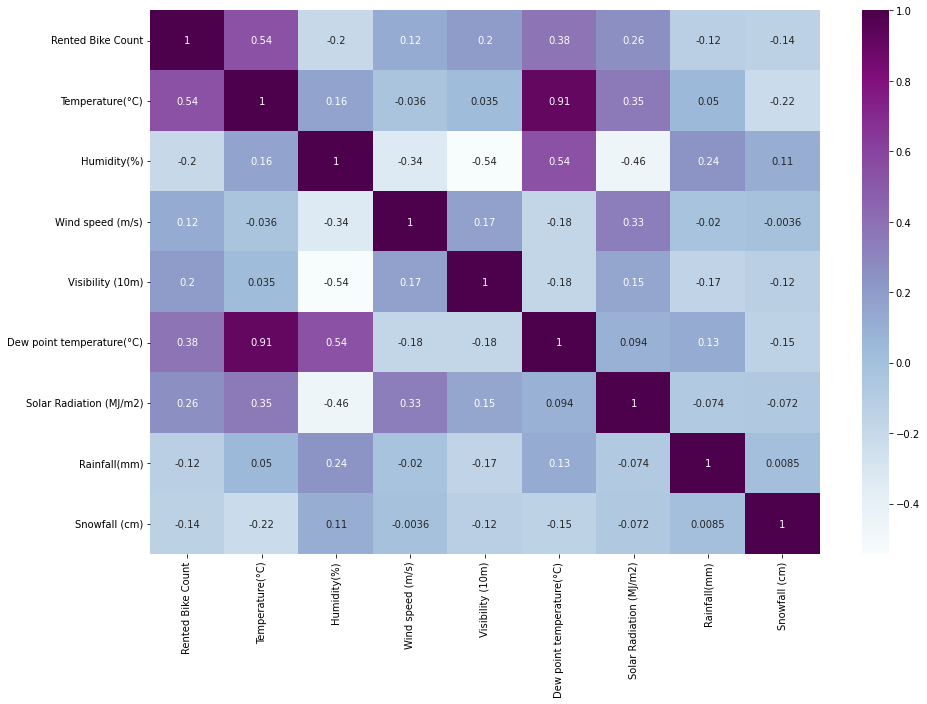

In [24]:
# Checking correlation using heatmap
plt.figure(figsize=(15,10))
sns.heatmap(rent_bike_df.corr(),cmap='BuPu',annot=True)

From this graph we can see multicollinearity between Temperature and Dew point Temperature.

# Checking Multicollinearity

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor # calculating VIF values for our dataset featueres
def calculate_VIF(F):
 
   # Calculating VIF
   VIF = pd.DataFrame()
   VIF["variables"] = F.columns
   VIF["VIF"] = [variance_inflation_factor(F.values, i) for i in range(F.shape[1])]
 
   return(VIF)

In [26]:
calculate_VIF(rent_bike_df[[i for i in rent_bike_df.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Temperature(°C),29.075866
1,Humidity(%),5.069743
2,Wind speed (m/s),4.517664
3,Visibility (10m),9.051931
4,Dew point temperature(°C),15.201989
5,Solar Radiation (MJ/m2),2.821604
6,Rainfall(mm),1.079919
7,Snowfall (cm),1.118903


In [27]:
calculate_VIF(rent_bike_df[[i for i in rent_bike_df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])

,variables,VIF
0,Temperature(°C),3.166007
1,Humidity(%),4.758651
2,Wind speed (m/s),4.079926
3,Visibility (10m),4.409448
4,Solar Radiation (MJ/m2),2.246238
5,Rainfall(mm),1.078501
6,Snowfall (cm),1.118901


In [28]:
rent_bike_df.drop(columns=['Dew point temperature(°C)'],inplace=True) #dropping Dew point temperature as it increases VIF ...

# EDA

EDA helps us to identify trends, patterns, and relationships in the data that are not readily apparent.

In [29]:
# Dividing Data in categorical and numerical features
Numerical_Features= rent_bike_df.select_dtypes(exclude='object')
Categorical_Features=rent_bike_df.select_dtypes(include='object')

In [30]:
Numerical_Features.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0


In [31]:
Categorical_Features.head()

,Hour,Seasons,Holiday,Functioning Day,Month,WeekdayorWeekend
0,0,Winter,No Holiday,Yes,12,0
1,1,Winter,No Holiday,Yes,12,0
2,2,Winter,No Holiday,Yes,12,0
3,3,Winter,No Holiday,Yes,12,0
4,4,Winter,No Holiday,Yes,12,0


# Lets Explore our categorical Features ..

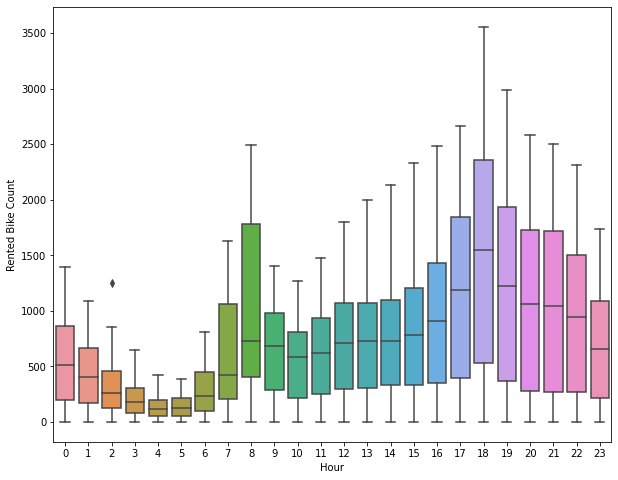

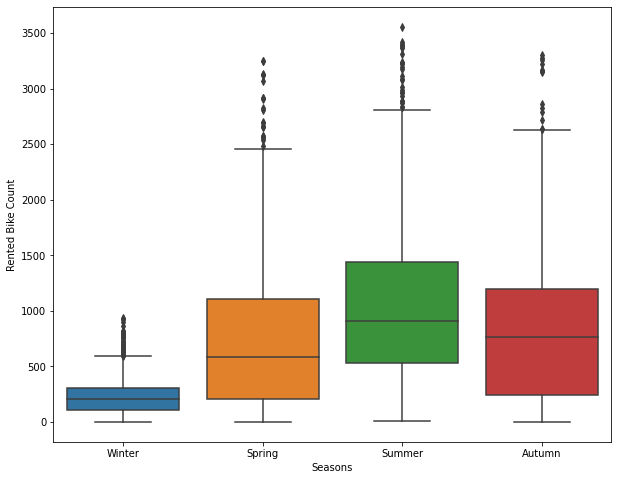

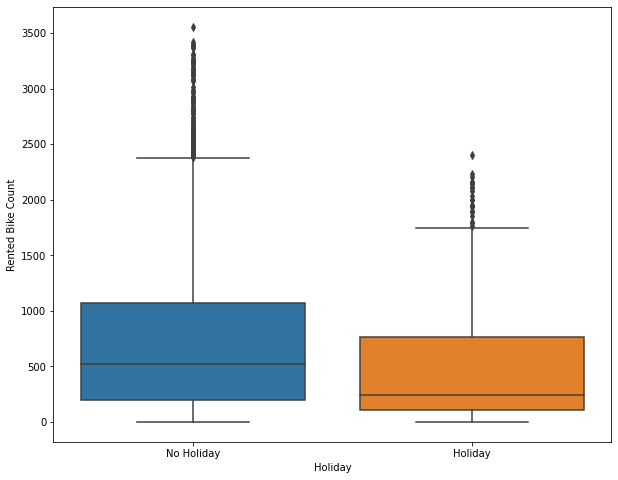

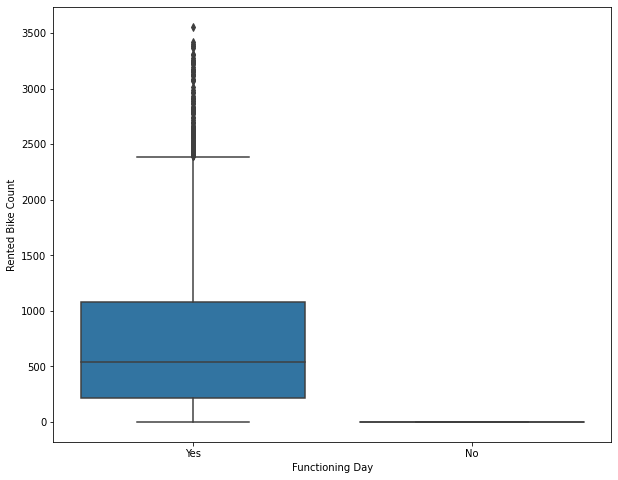

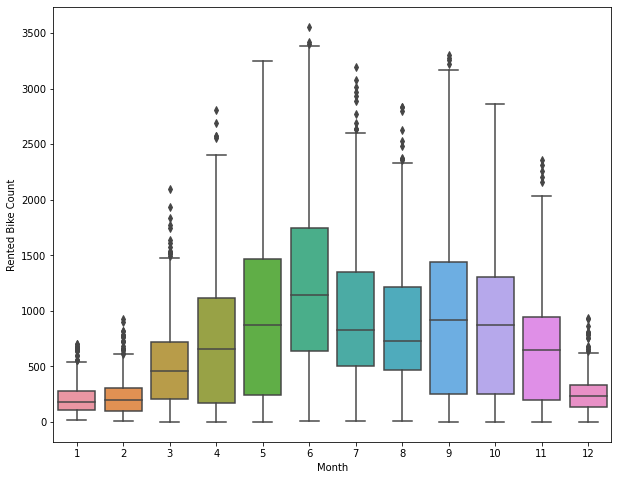

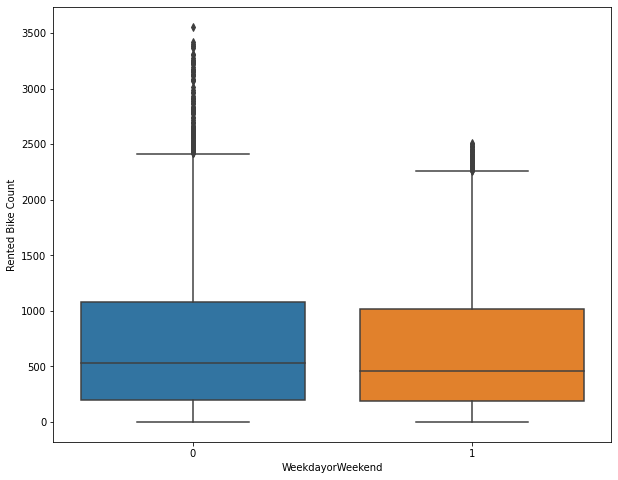

In [32]:
# Ploting Box plot to visualize and get some information from the features..
for col in Categorical_Features:
  plt.figure(figsize=(10,8))
  sns.boxplot(x=rent_bike_df[col],y=rent_bike_df["Rented Bike Count"])
  plt.show()

**Conclusion**

Less demand on winter season and more demand is in summer season.

Sligthly Higher demand during Non holidays.

Almost no demnad on non functioning day.

Most demand for bike is in between 7 to 9 AM and 5 to 8 PM .

More demand is in months May , June , July , August , september, November (Summer season) and less demand in december , January and February(Winter Season).




Weekday or weekend doesnt affect the rented bike count , we will try to see on the basis of hours how it affects.

[Text(0.5, 1.0, 'Count of Rented bikes acording to WeekdaysorWeekend ')]

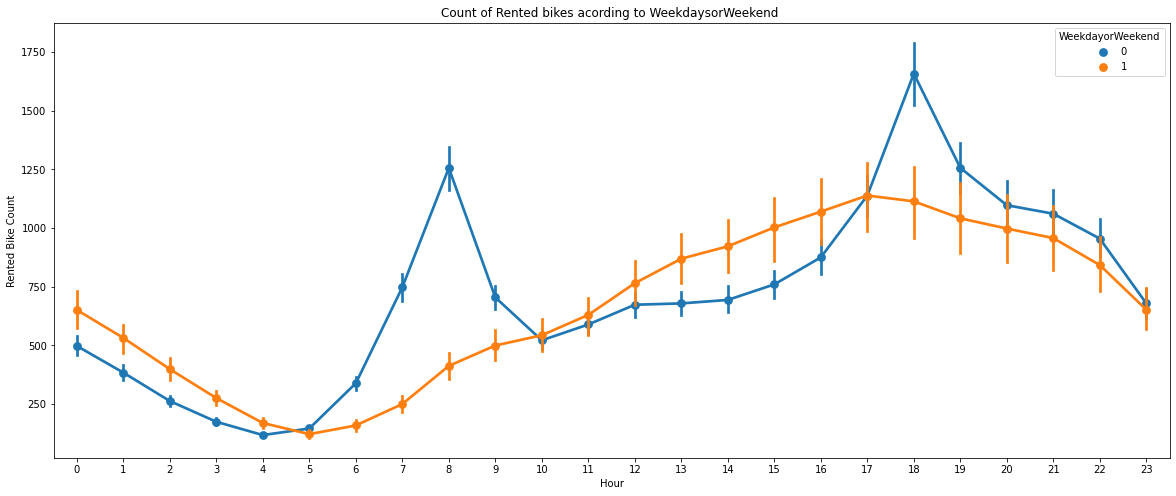

In [33]:
# Hourly analysis of weekday or weekend feature 
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=rent_bike_df,x='Hour',y='Rented Bike Count',hue='WeekdayorWeekend',ax=ax)
ax.set(title='Count of Rented bikes acording to WeekdaysorWeekend ')

For Weekdays the count is higher in Morning 7 to 9 Am and then in the evening 5 to 8 PM 

For weekends count is low in the morning but it gradually increases after 10 AM.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

# Now we will start to explore our numerical features..

1) First we will check oour dependent variable..

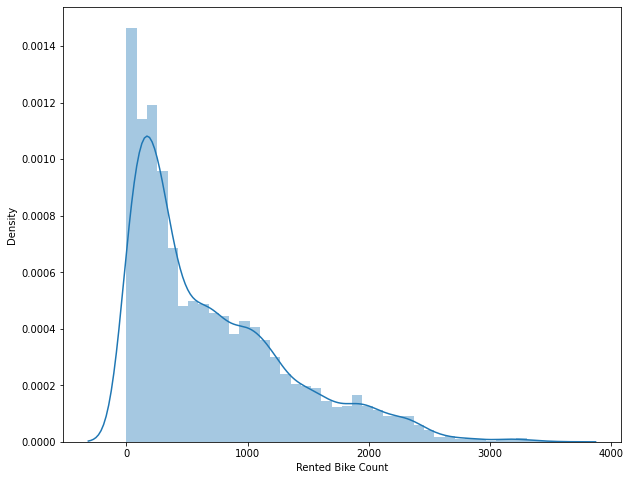

In [34]:
# Plotting  the dependent variable
plt.figure(figsize=(10,8))
sns.distplot(rent_bike_df['Rented Bike Count'])

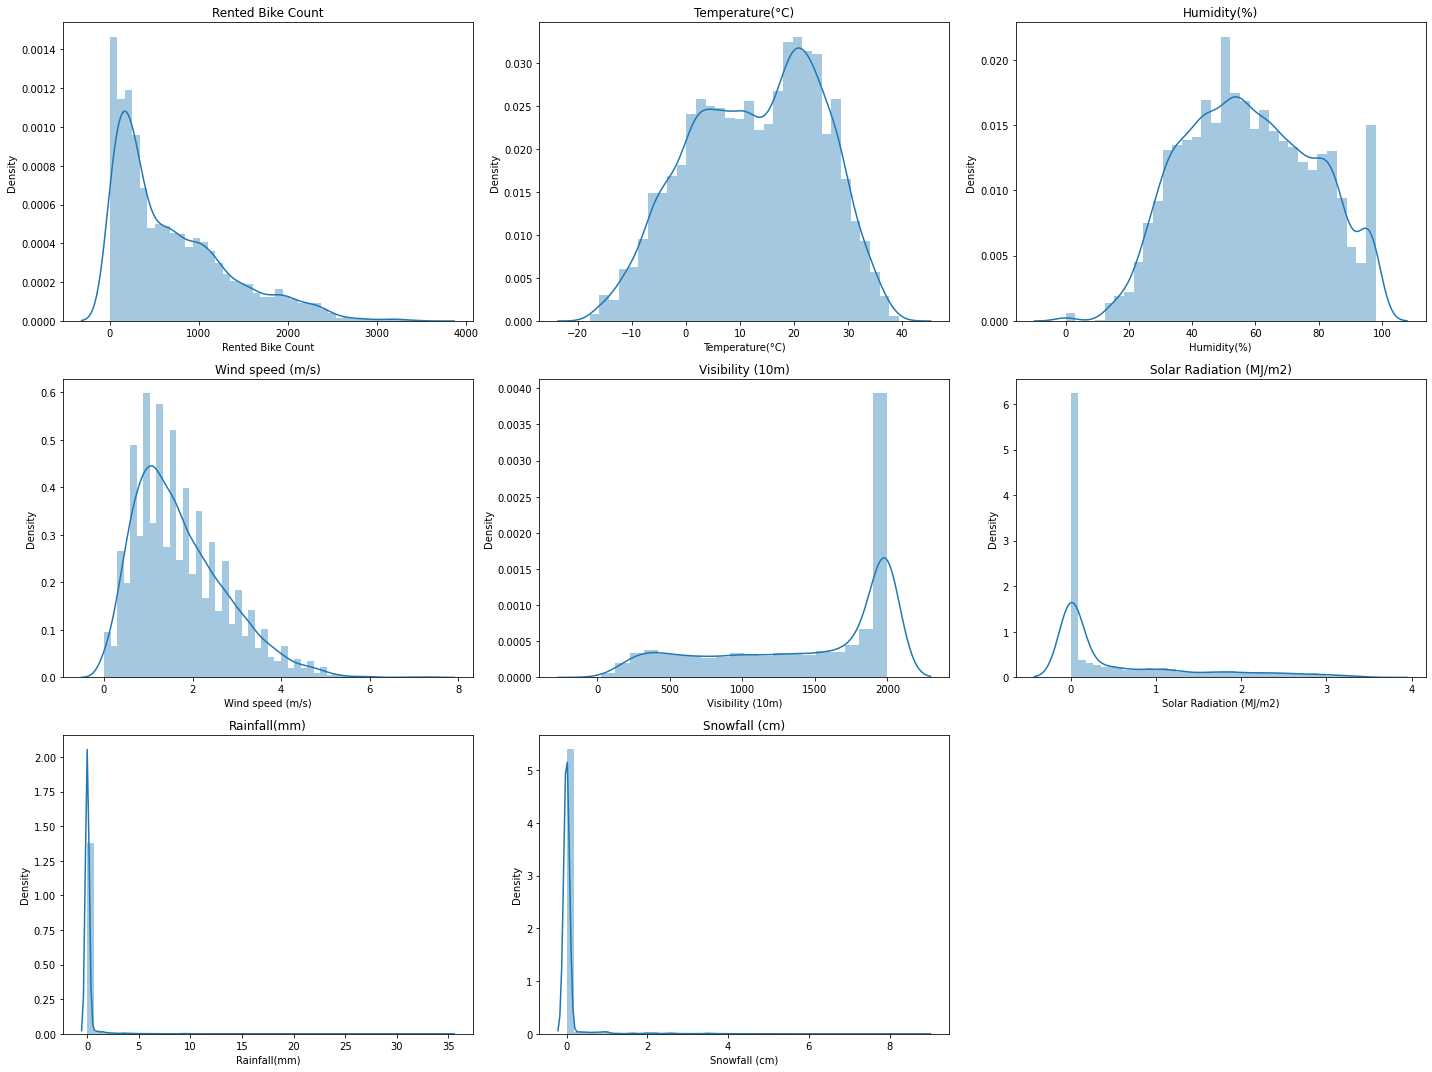

In [35]:
# Plotting all the numerical Features
n=1
plt.figure(figsize=(20,15))
for i in Numerical_Features.columns:
  plt.subplot(3,3,n)                   # Subplotting all the graphs
  n=n+1
  sns.distplot(rent_bike_df[i])
  plt.title(i)
  plt.tight_layout()


As we can see a lot of variables are skewed .. so we will plot histogram to get some information about their mean and median

If the data is right skewed we will find its mean on right side of the median and if the data is left skewed we will find the mean on left side of median..

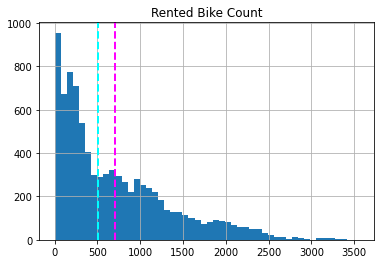

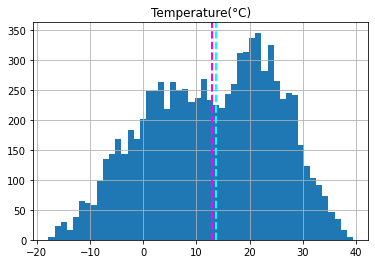

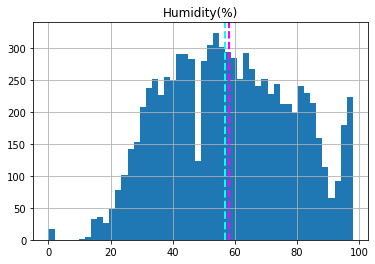

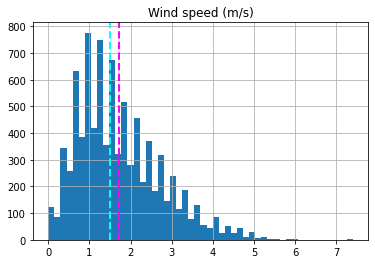

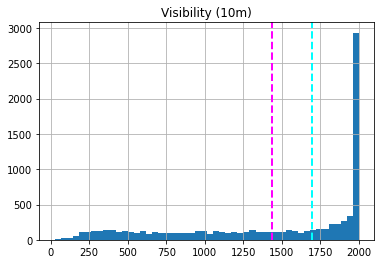

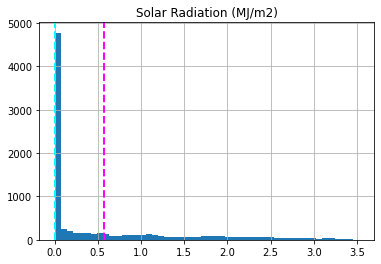

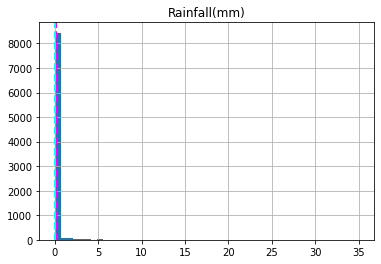

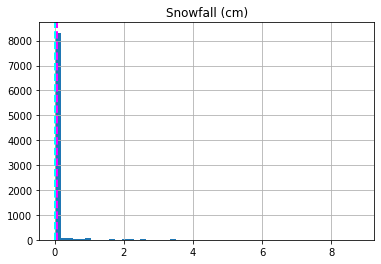

In [36]:
# Plotting histogram for all the Numerical Features of the dataset
for col in Numerical_Features[:]:  # we are looping through our Numerical_Features
  fig=plt.figure()
  ax=fig.gca()
  feature=rent_bike_df[col]
  feature.hist(bins=50,ax=ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2) # Creating a axis with magenta colour which represents mean of the feature
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)  # Creating a axis with cyan colour which represents median of the feature
  ax.set_title(col)

By observing 'Mean and Median' We can see the the Left or Right skewness in data.

**Right skewed columns are :**

Rented Bike Count (Dependent variable), Wind speed (m/s), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm),

**Left skewed columns are :**
Visibility (10m)

# Regression PLot

 Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.

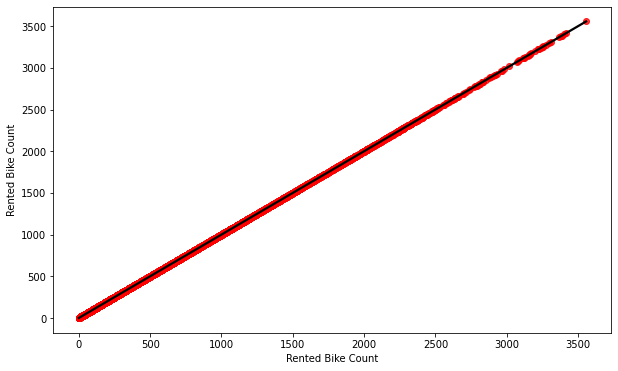

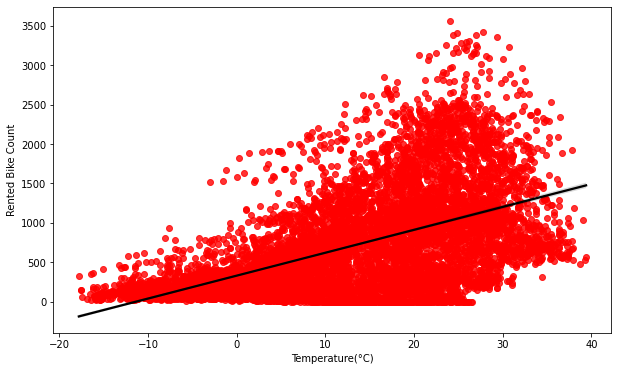

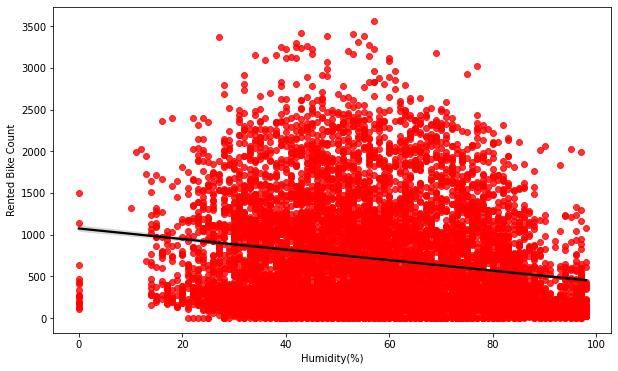

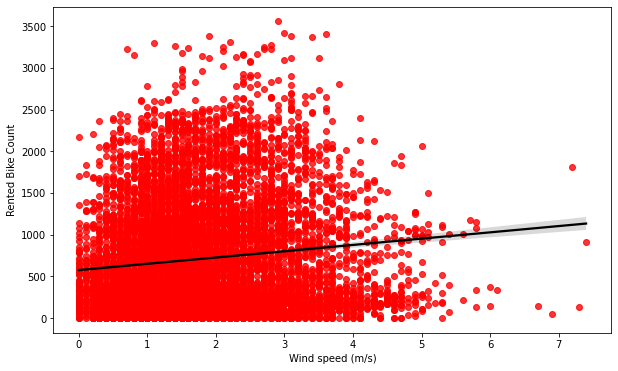

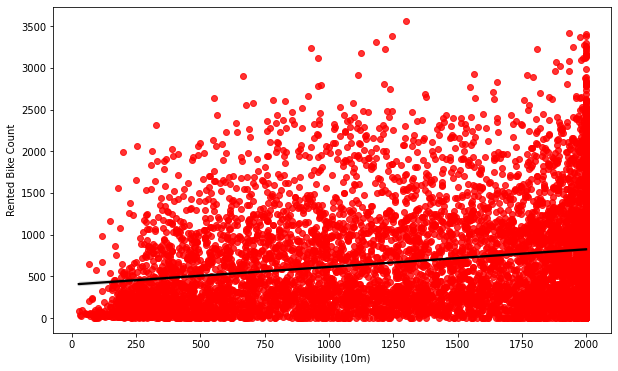

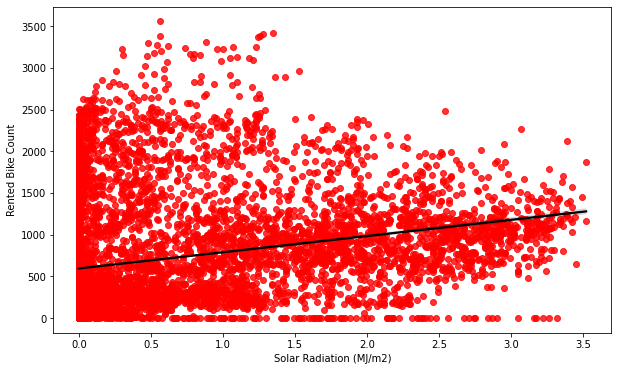

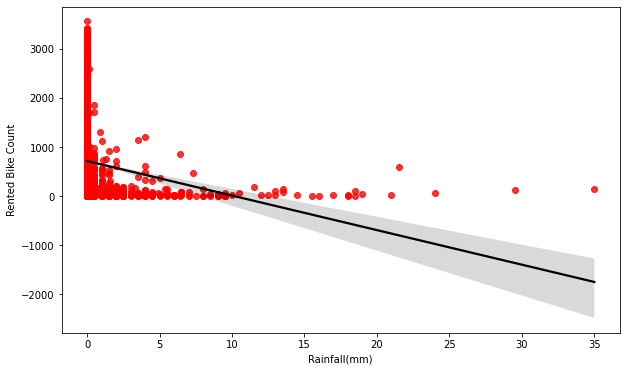

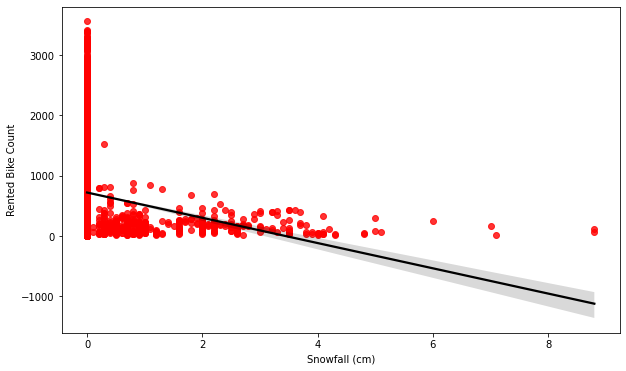

In [37]:
# Printing the regression plot for all the numerical features
for col in Numerical_Features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=rent_bike_df[col],y=rent_bike_df['Rented Bike Count'],scatter_kws={"color": 'red'}, line_kws={"color": "black"})

From above 'Regression Plots' we can see that 'Temperature',  'Wind_speed' ,       'Visibility' ,'Solar_Radiation' this features are positively related with our dependent variable.

And 'Rainfall' , 'Snowfall' , 'Humidity'  these features are negatively related with the dependent variable or Target variable

# Feature Engineering

So , As we saw our depemdent variable is right skewed. So we will try some transformations to make it normalize.

Text(0.5, 1.0, 'square')

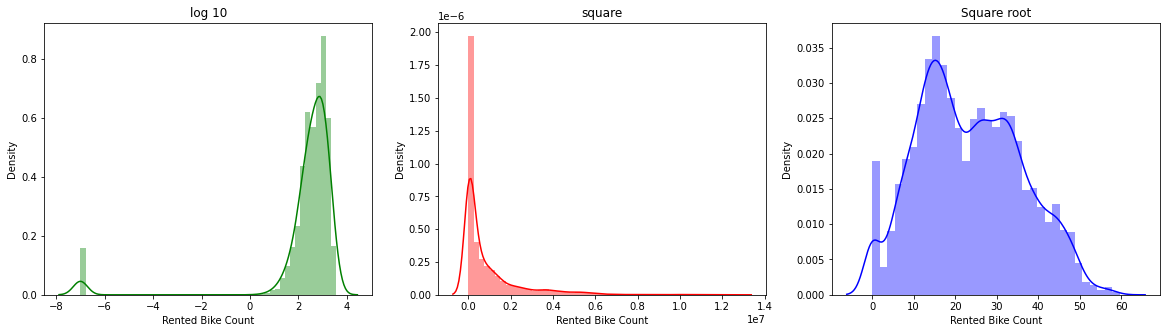

In [38]:
#Checking with some tranformations on Dependent variable'Rented Bike Count'
fig,axes = plt.subplots(1,3,figsize=(20,5))
sns.distplot(np.sqrt(rent_bike_df['Rented Bike Count']),ax=axes[2], color='blue').set_title("Square root")  #applying Square root transformation
sns.distplot(np.log10(rent_bike_df['Rented Bike Count']+0.0000001),ax=axes[0],color='green').set_title("log 10")
sns.distplot((rent_bike_df['Rented Bike Count']**2),ax=axes[1],color='red').set_title("square")


As we can see 'Square Root' tranformation is normalizing the dependent variable so we will use this transformation. 

In [39]:
C_rent_bike_df= rent_bike_df.copy()  # creating the copy of our dataset

we are creating dummy variables for our categorical features with the help of 'one hot encoding'.

In [40]:
#creating dummy variables for our categorical features
for col in Categorical_Features :
    C_rent_bike_df= pd.concat([C_rent_bike_df , pd.get_dummies(C_rent_bike_df[col] ,prefix =col ,drop_first =True)], axis =1)
    C_rent_bike_df = C_rent_bike_df.drop([col], axis =1)
C_rent_bike_df.head()       


,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_1,Hour_2,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,WeekdayorWeekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [41]:
C_rent_bike_df.shape

(8760, 48)

In [42]:
C_rent_bike_df.columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4',
       'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11',
       'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17',
       'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Functioning Day_Yes', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Month_10', 'Month_11', 'Month_12', 'WeekdayorWeekend_1'],
      dtype='object')

# Training the Model

In [43]:
#seperating the columns as X and Y
X = C_rent_bike_df.drop(columns=['Rented Bike Count'], axis=1)
y = np.sqrt(C_rent_bike_df['Rented Bike Count'])

In [44]:
pd.set_option('display.max_columns', 1000)
X.head(2)


,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,WeekdayorWeekend_1
0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0


In [45]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented Bike Count, dtype: float64

In [46]:
#Creat test and train data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 47)
(2190, 47)


# Linear Regression

In [47]:
# building the model and fitting training data
reg= LinearRegression().fit(X_train, y_train)

In [48]:
# checking the score
reg.score(X_train, y_train)

0.7722101548255267

In [49]:
reg.coef_

array([ 5.11538263e-01, -1.27236196e-01, -2.90122073e-02,  9.90615715e-04,
        8.89701409e-01, -1.48171446e+00, -8.13629988e-02, -2.04211065e+00,
       -4.95822637e+00, -7.23630435e+00, -9.51882072e+00, -9.04457949e+00,
       -4.03213994e+00,  2.27462862e+00,  7.54438892e+00,  1.25491521e+00,
       -3.27047269e+00, -3.46014138e+00, -2.74135788e+00, -2.96341191e+00,
       -3.18317912e+00, -1.92136354e+00,  1.11918595e-01,  3.83216182e+00,
        1.02397844e+01,  6.78230326e+00,  6.08102846e+00,  6.20280481e+00,
        5.04597766e+00,  1.46736086e+00, -4.81648861e-01, -1.26348263e+00,
       -4.80391365e+00,  3.51130869e+00,  2.82758278e+01, -8.13449897e-01,
       -1.53946964e+00, -6.75094331e-01,  1.73291511e+00,  4.41327425e+00,
       -1.71047504e+00, -3.96628184e+00,  6.27209321e-01,  3.28833588e+00,
        2.63349995e+00,  2.07210333e+00, -1.42458875e+00])

In [50]:
# predict for train data
y_pred_train=reg.predict(X_train)

# predict for test data
y_pred_test=reg.predict(X_test)

In [51]:
y_train

8639    19.467922
3614    32.480764
1387    11.045361
3900     3.316625
8044    12.124356
          ...    
4373    17.492856
7891    44.362146
4859    32.649655
3264    20.024984
2732    22.649503
Name: Rented Bike Count, Length: 6570, dtype: float64

In [52]:
y_pred_train

array([19.82686244, 30.40419766, 19.97981989, ..., 34.4868104 ,
       22.86068817, 21.25746105])

In [53]:
y_test

4059    17.888544
6914    24.083189
233     15.033296
982     12.845233
5967    25.416530
          ...    
475     13.784049
4732    17.804494
4958    31.874755
8244     0.000000
5246    37.815341
Name: Rented Bike Count, Length: 2190, dtype: float64

In [54]:
y_pred_test

array([16.16457355, 22.81803818, 19.61285211, ..., 40.81315274,
        1.54093433, 31.70818986])

In [55]:
# calculating MSE
MSE_LR= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_LR)

# calculating RMSE
RMSE_LR=np.sqrt(MSE_LR)
print("RMSE :",RMSE_LR)


# calculating MAE
MAE_LR= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_LR)


# calculating r2 and adjusted r2
r2_LR= r2_score(y_train, y_pred_train)
print("R2 :",r2_LR)
Adjusted_R2_LR = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_LR )



MSE : 35.07751288189292
RMSE : 5.9226271942350825
MAE : 4.474024092996788
R2 : 0.7722101548255267
Adjusted R2 : 0.7672119649454145


In [56]:
# storing the test set metrics value in the train evaluation dataframe.
Train_dict1={'Model':'Linear regression ',
       'MAE':round((MAE_LR),3),
       'MSE':round((MSE_LR),3),
       'RMSE':round((RMSE_LR),3),
       'R2_score':round((r2_LR),3),
       'Adjusted R2':round((Adjusted_R2_LR ),2)
       }
Training_df=pd.DataFrame(Train_dict1,index=[1])

In [57]:
# calculating MSE
MSE_LR= mean_squared_error((y_test), (y_pred_test))
print("MSE :",MSE_LR)

# calculating RMSE
RMSE_LR=np.sqrt(MSE_LR)
print("RMSE :",RMSE_LR)


# calculating MAE
MAE_LR= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_LR)


# calculating r2 and adjusted r2
r2_LR= r2_score(y_train, y_pred_train)
print("R2 :",r2_LR)
Adjusted_R2_LR = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_LR )

MSE : 33.27533089591926
RMSE : 5.76847734639907
MAE : 4.474024092996788
R2 : 0.7722101548255267
Adjusted R2 : 0.7672119649454145


In [58]:
# storing the test set metrics value in test evaluation dataframe.
Test_dict2={'Model':'Linear regression ',
       'MAE':round((MAE_LR),3),
       'MSE':round((MSE_LR),3),
       'RMSE':round((RMSE_LR),3),
       'R2_score':round((r2_LR),3),
       'Adjusted R2':round((Adjusted_R2_LR ),2)
       }
Test_df=pd.DataFrame(Test_dict2,index=[1])

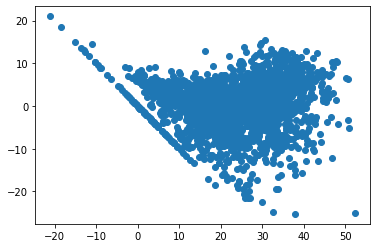

In [59]:
### Heteroscadacity
plt.scatter(((y_pred_test)),((y_test))-((y_pred_test)))

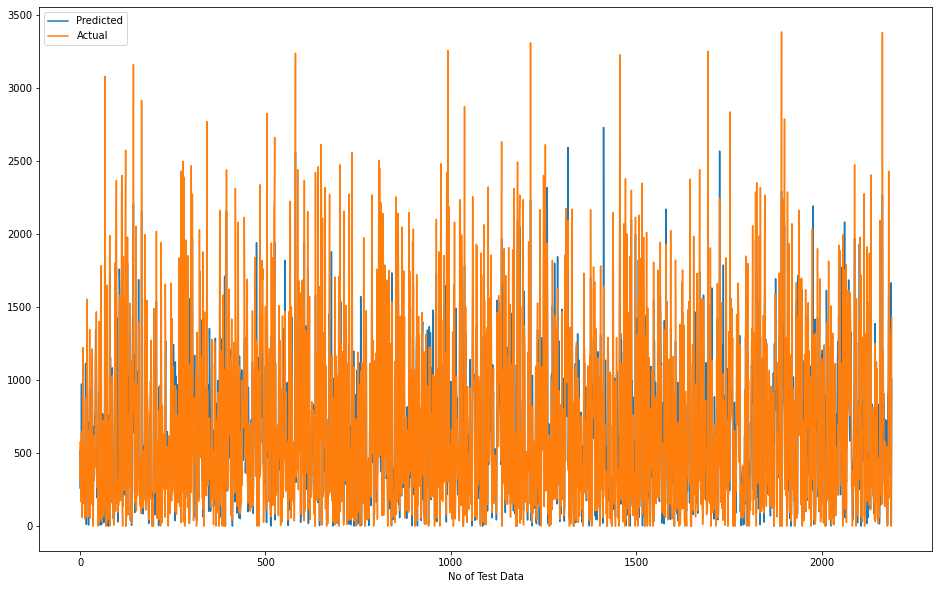

In [60]:
# Plotting The actual vs Predicted graph
plt.figure(figsize=(16,10))
plt.plot((y_pred_test)**2)
plt.plot(np.array((y_test)**2))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

Text(0.5, 0, 'Actual Values')

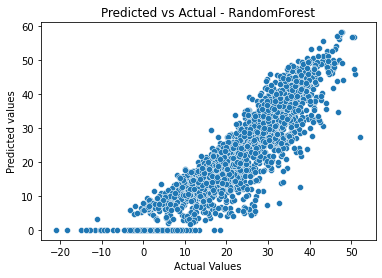

In [61]:
#visualizing the predictions
sns.scatterplot(x=y_pred_test ,y=y_test)
plt.title('Predicted vs Actual - RandomForest')
plt.ylabel('Predicted values')
plt.xlabel('Actual Values')

# Linear regression model from statsmodels.api.

In [62]:
import statsmodels.api as sm
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

In [63]:
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     690.3
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        03:00:43   Log-Likelihood:                -27947.
No. Observations:                8760   AIC:                         5.598e+04
Df Residuals:                    8715   BIC:                         5.630e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -5.5006      0.695     -7.916      0.000      -6.863      -4.138
Temperature(°C)             0.5187      0.018     29.343      0.000       0.484       0.553
Humidity(%)                -0.1262      0.005    -23.146      0.000      -0.137      -0.116
Wind speed (m/s)           -0.0383      0.073     -0.528      0.598      -0.181       0.104
Visibility (10m)            0.0010      0.000      6.100      0.000       0.001       0.001
Solar Radiation (MJ/m2)     0.8316      0.156      5.328      0.000       0.526       1.138
Rainfall(mm)               -1.5855      0.058    -27.127      0.000      -1.700      -1.471
Snowfall (cm)              -0.0446      0.154     -0.290      0.772      -0.346       0.257
Hour_1                     -2.1411      0.437     -4.904      0.000      -2.997      -1.285
Hour_2                     -4.7949      0.437    -10.973      0.000      -5.652      -3.938
Hour_3                     -7.3291      0.437    -16.756      0.000      -8.187      -6.472
Hour_4                     -9.5639      0.438    -21.850      0.000     -10.422      -8.706
Hour_5                     -9.2135      0.439    -21.011      0.000     -10.073      -8.354
Hour_6                     -4.4190      0.439    -10.065      0.000      -5.280      -3.558
Hour_7                      2.0429      0.439      4.649      0.000       1.181       2.904
Hour_8                      7.8748      0.442     17.818      0.000       7.008       8.741
Hour_9                      1.0647      0.452      2.358      0.018       0.179       1.950
Hour_10                    -3.2830      0.469     -6.995      0.000      -4.203      -2.363
Hour_11                    -3.3452      0.489     -6.845      0.000      -4.303      -2.387
Hour_12                    -2.7902      0.504     -5.537      0.000      -3.778      -1.802
Hour_13                    -2.8676      0.510     -5.628      0.000      -3.866      -1.869
Hour_14                    -3.0946      0.502     -6.159      0.000      -4.080      -2.110
Hour_15                    -1.9206      0.490     -3.916      0.000      -2.882      -0.959
Hour_16                    -0.1171      0.474     -0.247      0.805      -1.046       0.811
Hour_17                     3.8930      0.459      8.481      0.000       2.993       4.793
Hour_18                     9.7781      0.449     21.780      0.000       8.898      10.658
Hour_19                     6.6980      0.444     15.098      0.000       5.828       7.568
Hour_20                     5.9801      0.441     13.564      0.000       5.116       6.844
Hour_21                     6.2203      0.438     14.188      0.000       5.361       7.080
Hour_22                     5.0415      0.437     11.538      0.000       4.185       5.898
Hour_23                     1.5549      0.436  

# Lasso Regression

In [64]:
# Creating an instance of Lasso Regression implementation
lasso = Lasso(alpha=1.0, max_iter=3000)

# Fitting the Lasso model
lasso.fit(X_train, y_train)

# Model Score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.3873692800799008 0.40519624904934015


In [65]:
#Predict for training data
y_pred_train_lasso=lasso.predict(X_train)

# Predict for testing data
y_pred_test_lasso=lasso.predict(X_test)

In [66]:
lasso.coef_

array([ 6.08331239e-01, -1.78445210e-01,  0.00000000e+00,  2.57645719e-04,
       -0.00000000e+00, -5.35382462e-01,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00])

In [67]:
# calculating MSE
MSE_L= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_L)

# calculating RMSE
RMSE_L=np.sqrt(MSE_L)
print("RMSE :",RMSE_L)


# calculating MAE
MAE_L= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_L)


# calculating r2 and adjusted r2
r2_L= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_L)
Adjusted_R2_L = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_L )

MSE : 91.59423336097032
RMSE : 9.570487623991283
MAE : 7.255041571454952
R2 : 0.40519624904934015
Adjusted R2 : 0.3921449996120475


In [68]:
# storing the train set metrics value in the train evaluation dataframe
Train_dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_L),3),
       'MSE':round((MSE_L),3),
       'RMSE':round((RMSE_L),3),
       'R2_score':round((r2_L),3),
       'Adjusted R2':round((Adjusted_R2_L ),2)
       }
Training_df = Training_df.append(Train_dict1,ignore_index=True)

In [69]:
# calculating MSE
MSE_L= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_L)

# calculating RMSE
RMSE_L=np.sqrt(MSE_L)
print("RMSE :",RMSE_L)


# calculating MAE
MAE_L= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_L)


# calculating r2 and adjusted r2
r2_L= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_L)
Adjusted_R2_L=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_L )

MSE : 96.7750714044618
RMSE : 9.837432155011886
MAE : 7.455895061963607
R2 : 0.3873692800799008
Adjusted R2 : 0.37392686932535146


In [70]:
# storing the test set metrics value in the test evaluation dataframe
Test_dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_L),3),
       'MSE':round((MSE_L),3),
       'RMSE':round((RMSE_L),3),
       'R2_score':round((r2_L),3),
       'Adjusted R2':round((Adjusted_R2_L ),2),
       }
Test_df=Test_df.append(Test_dict2,ignore_index=True)

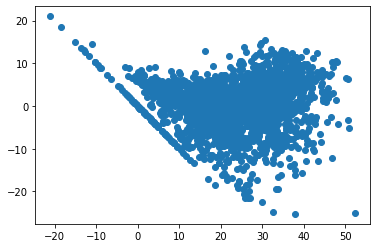

In [71]:
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

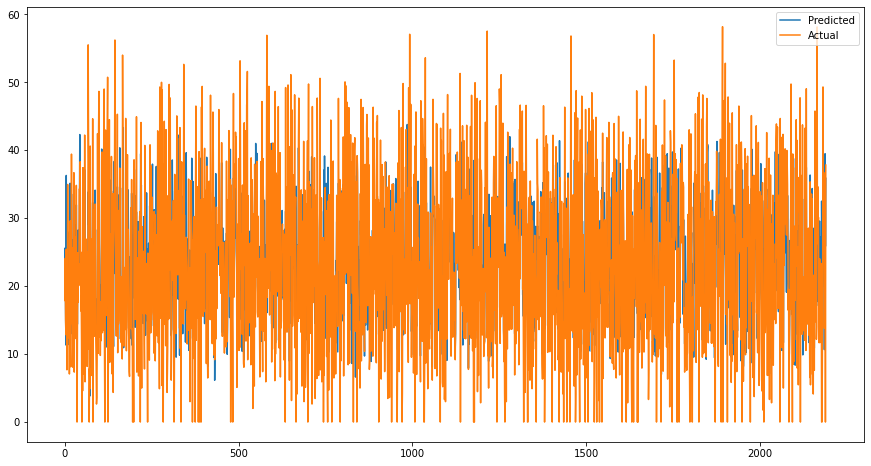

In [72]:
#Plot the actual vs predicted graph.
plt.figure(figsize=(15,8))
plt.plot(np.array((y_pred_test_lasso)))
plt.plot(np.array(((y_test))))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0, 'Actual Values')

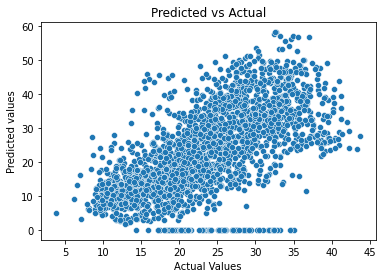

In [73]:
#visualizing the predictions
sns.scatterplot(x=y_pred_test_lasso,y=y_test)
plt.title('Predicted vs Actual')
plt.ylabel('Predicted values')
plt.xlabel('Actual Values')

# Ridge Regression

In [74]:
# Creating the model object
ridge= Ridge(alpha=0.1)

In [75]:
# FITTING THE MODEL
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [76]:
# checking the score
ridge.score(X_train, y_train)

0.7722100789802107

In [77]:
# predict for train data
y_pred_train_ridge=ridge.predict(X_train)

# predict for test data
y_pred_test_ridge=ridge.predict(X_test)

In [78]:
# calculating MSE
MSE_R= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_R)

# calculating RMSE
RMSE_R=np.sqrt(MSE_R)
print("RMSE :",RMSE_R)


# calculating MAE
MAE_R= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_R)


# calculating r2 and adjusted r2
r2_R= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_R)
Adjusted_R2_R=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_R)

MSE : 35.07752456136463
RMSE : 5.922628180239296
MAE : 4.474125776125378
R2 : 0.7722100789802107
Adjusted R2 : 0.7672118874358922


In [79]:
# storing the train set metrics value in the train evaluation dataframe 
Train_dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_R),3),
       'MSE':round((MSE_R),3),
       'RMSE':round((RMSE_R),3),
       'R2_score':round((r2_R),3),
       'Adjusted R2':round((Adjusted_R2_R ),2)}
Training_df=Training_df.append(Train_dict1,ignore_index=True)

In [80]:
# calculating MSE
MSE_R= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_R)

# calculating RMSE
RMSE_R=np.sqrt(MSE_R)
print("RMSE :",RMSE_R)


# calculating MAE
MAE_R= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_R)


# calculating r2 and adjusted r2
r2_R= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_R)
Adjusted_R2_R=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_R)

MSE : 33.27678426818438
RMSE : 5.768603320404722
MAE : 4.410414932539515
R2 : 0.7893426477812578
Adjusted R2 : 0.7847203809491939


In [81]:
# storing the test set metrics value in the test evaluation dataframe
Test_dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_R),3),
       'MSE':round((MSE_R),3),
       'RMSE':round((RMSE_R),3),
       'R2_score':round((r2_R),3),
       'Adjusted R2':round((Adjusted_R2_R ),2)}
Test_df=Test_df.append(Test_dict2,ignore_index=True)

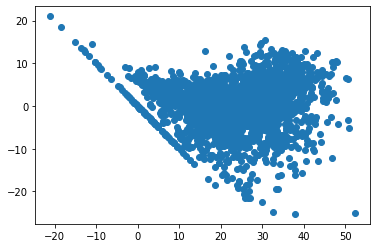

In [82]:
### Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

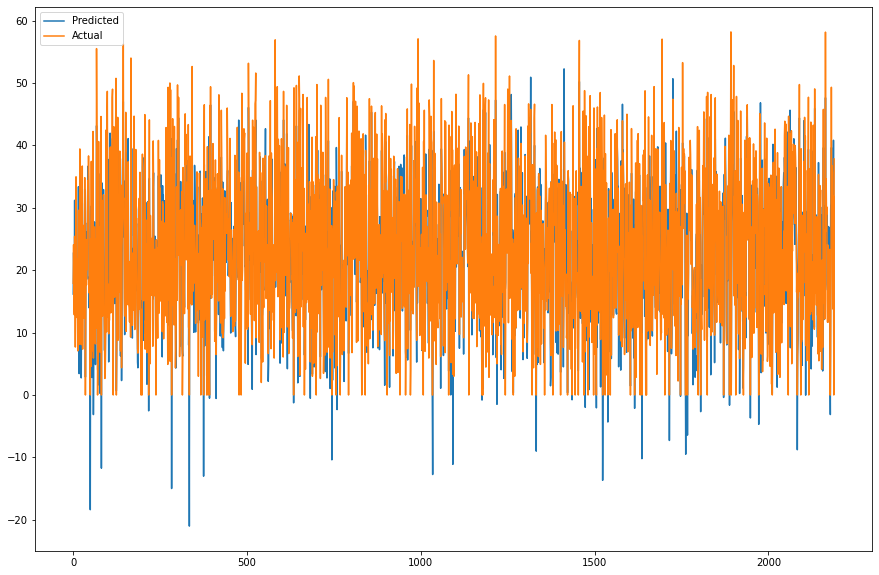

In [83]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(((y_pred_test_ridge)))
plt.plot((np.array((y_test))))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0, 'Actual Values')

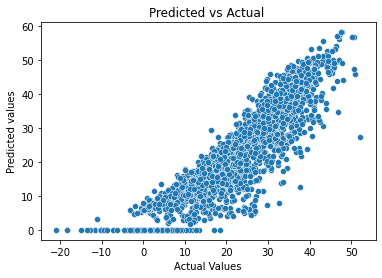

In [84]:
#visualizing the predictions
sns.scatterplot(x=y_pred_test_ridge,y=y_test)
plt.title('Predicted vs Actual ')
plt.ylabel('Predicted values')
plt.xlabel('Actual Values')

# Elastic Net Regression

In [85]:
# creating a model object.
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [86]:
# creating a model object.
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
# FIT THE MODEL
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [87]:
# check the score
elasticnet.score(X_train, y_train)

0.6261189054494012

In [88]:
# predict on train data
y_pred_train_en=elasticnet.predict(X_train)

# predict on test data
y_pred_test_en=elasticnet.predict(X_test)

In [89]:
# calculating MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

# calculating RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


# calculating MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


# calculating r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e = (1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_e)

MSE : 57.5742035398887
RMSE : 7.587766703048315
MAE : 5.792276538970546
R2 : 0.6261189054494012
Adjusted R2 : 0.6179151652795234


In [90]:
# storing the train set metrics value into the train evaluation dataframe
Train_dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
Training_df=Training_df.append(Train_dict1,ignore_index=True)

In [91]:
# calculating MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

# calculating RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


# calculating MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)


# calculating r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)

Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_e)

MSE : 59.45120536350042
RMSE : 7.710460775044538
MAE : 5.873612334800099
R2 : 0.6236465216363589
Adjusted R2 : 0.6153885321484546


In [92]:
# storing the test set metrics value into the test evaluation dataframe
Test_dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
Test_df=Test_df.append(Test_dict2,ignore_index=True)

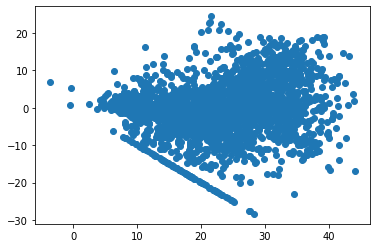

In [93]:
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en))

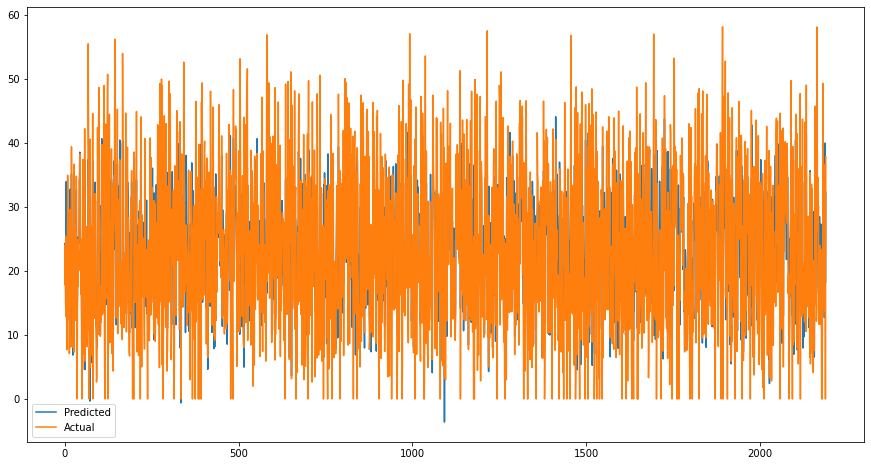

In [94]:
#Plotting the figure
plt.figure(figsize=(15,8))
plt.plot(((y_pred_test_en)))
plt.plot((np.array((y_test))))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0, 'Actual Values')

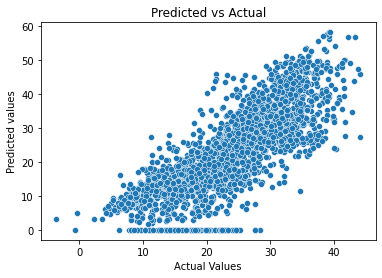

In [95]:
#visualizing the predictions
sns.scatterplot(x=y_pred_test_en,y=y_test)
plt.title('Predicted vs Actual')
plt.ylabel('Predicted values')
plt.xlabel('Actual Values')

In [96]:
Test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,4.474,33.275,5.768,0.772,0.77
1,Lasso regression,7.456,96.775,9.837,0.387,0.37
2,Ridge regression,4.410,33.277,5.769,0.789,0.78
3,Elastic net regression Test,5.874,59.451,7.710,0.624,0.62


# Implementing Cross-Validation procedure for Lasso Regression

In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=4)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [99]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -35.7323616934093


In [100]:
# predict on train data
y_pred_train_lasso=lasso_regressor.predict(X_train)

# predict on test data
y_pred_test_lasso=lasso_regressor.predict(X_test)

In [101]:
# calculating MSE
MSE_LCV= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_LCV)

# calculating RMSE
RMSE_LCV=np.sqrt(MSE_LCV)
print("RMSE :",RMSE_LCV)


# calculating MAE
MAE_LCV= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_LCV)


# calculating r2 and adjusted r2
r2_LCV= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_LCV)
Adjusted_R2_LCV = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_LCV)

MSE : 35.07868077441708
RMSE : 5.922725789230587
MAE : 4.474041218018374
R2 : 0.7722025706487878
Adjusted R2 : 0.7672042143558341


In [102]:
# storing the train set metrics value into the train evaluation dataframe
Train_dict1={'Model':'Lasso regression with Cross-validation',
       'MAE':round((MAE_LCV),3),
       'MSE':round((MSE_LCV),3),
       'RMSE':round((RMSE_LCV),3),
       'R2_score':round((r2_LCV),3),
       'Adjusted R2':round((Adjusted_R2_LCV),2)}
Training_df=Training_df.append(Train_dict1,ignore_index=True)

In [103]:
# calculating MSE
MSE_LCV= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_LCV)

# calculating RMSE
RMSE_LCV=np.sqrt(MSE_LCV)
print("RMSE :",RMSE_LCV)


# calculating MAE
MAE_LCV= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_LCV)


# calculating r2 and adjusted r2
r2_LCV= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_LCV)

Adjusted_R2_LCV=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_LCV)

MSE : 33.27578088545121
RMSE : 5.76851635045366
MAE : 4.410371317729226
R2 : 0.7893489996555294
Adjusted R2 : 0.7847268721969907


In [104]:
# storing the test set metrics value into the test evaluation dataframe
Test_dict2={'Model':'Lasso regression Test with cross-validation',
       'MAE':round((MAE_LCV),3),
       'MSE':round((MSE_LCV),3),
       'RMSE':round((RMSE_LCV),3),
       'R2_score':round((r2_LCV),3),
       'Adjusted R2':round((Adjusted_R2_LCV ),2)}
Test_df=Test_df.append(Test_dict2,ignore_index=True)

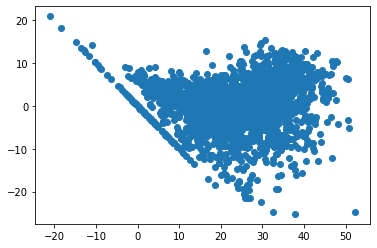

In [105]:
### Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test)-(y_pred_test_lasso))

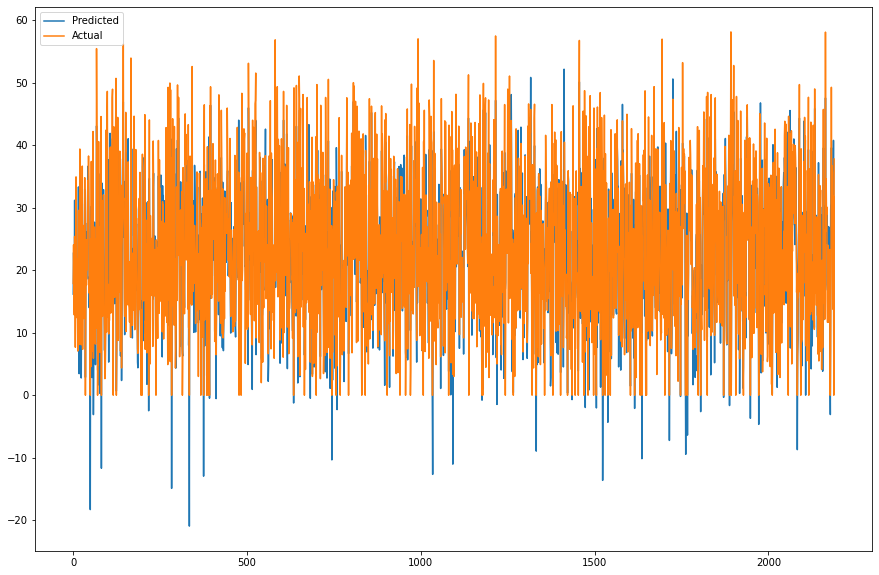

In [106]:
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_lasso))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0, 'Actual Values')

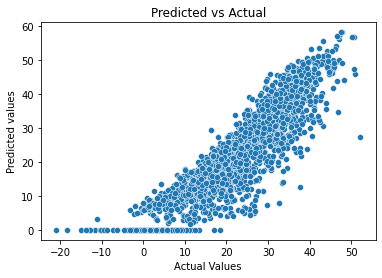

In [107]:
#visualizing the predictions
sns.scatterplot(x=y_pred_test_lasso,y=y_test)
plt.title('Predicted vs Actual')
plt.ylabel('Predicted values')
plt.xlabel('Actual Values')

# Implementing Cross-Validation procedure for Ridge Regression

In [108]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [109]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -35.65982661964563


In [110]:
# predict on train data
y_pred_train_Ridge=ridge_regressor.predict(X_train)

# predict on test data
y_pred_test_ridge=ridge_regressor.predict(X_test)

In [111]:
# calculating MSE
MSE_RCV= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_RCV)

# calculating RMSE
RMSE_RCV=np.sqrt(MSE_RCV)
print("RMSE :",RMSE_RCV)


# calculating MAE
MAE_RCV= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_RCV)


# calculating r2 and adjusted r2
r2_RCV= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_RCV)
Adjusted_R2_RCV = (1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_RCV)

MSE : 35.07752456136463
RMSE : 5.922628180239296
MAE : 4.474125776125378
R2 : 0.7722100789802107
Adjusted R2 : 0.7672118874358922


In [112]:
# storing the train set metrics value into the train evaluation dataframe
Train_dict1={'Model':'Ridge regression with Cross-validation',
       'MAE':round((MAE_RCV),3),
       'MSE':round((MSE_RCV),3),
       'RMSE':round((RMSE_RCV),3),
       'R2_score':round((r2_RCV),3),
       'Adjusted R2':round((Adjusted_R2_RCV),2)}
Training_df=Training_df.append(Train_dict1,ignore_index=True)

In [113]:
# calculating MSE
MSE_RCV= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_RCV)

# calculating RMSE
RMSE_RCV=np.sqrt(MSE_RCV)
print("RMSE :",RMSE_RCV)


# calculating MAE
MAE_RCV= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_RCV)


# calculating r2 and adjusted r2
r2_RCV= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_RCV)

Adjusted_R2_RCV=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_RCV)

MSE : 33.29094193082603
RMSE : 5.76983032080026
MAE : 4.41255423365733
R2 : 0.789253023264007
Adjusted R2 : 0.784628789880911


In [114]:
# storing the test set metrics value into the test evaluation dataframe
Test_dict2={'Model':'Ridge regression Test with cross-validation',
       'MAE':round((MAE_RCV),3),
       'MSE':round((MSE_RCV),3),
       'RMSE':round((RMSE_RCV),3),
       'R2_score':round((r2_RCV),3),
       'Adjusted R2':round((Adjusted_R2_RCV ),2)}
Test_df=Test_df.append(Test_dict2,ignore_index=True)

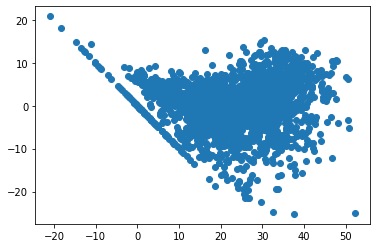

In [115]:
### Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

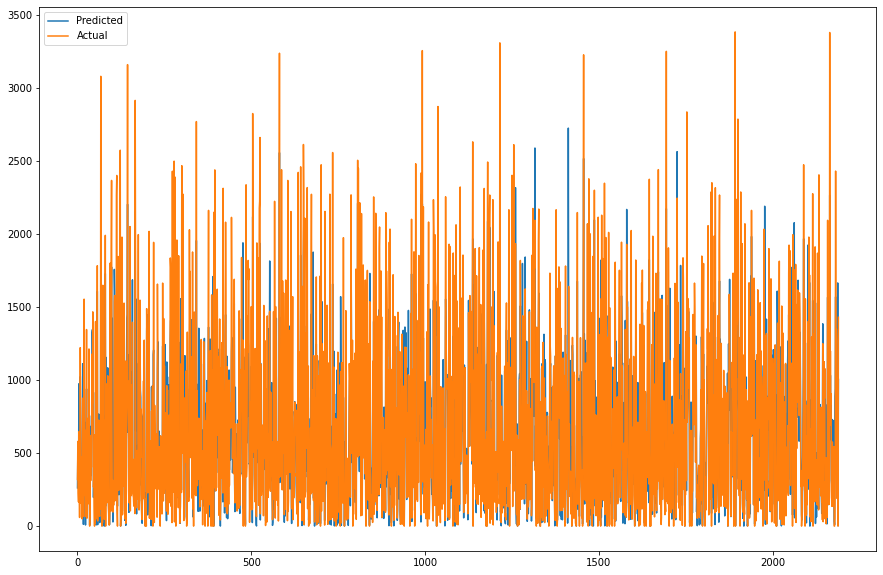

In [116]:
plt.figure(figsize=(15,10))
plt.plot(((y_pred_test_lasso)**2))
plt.plot((np.array((y_test)**2)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0, 'Actual Values')

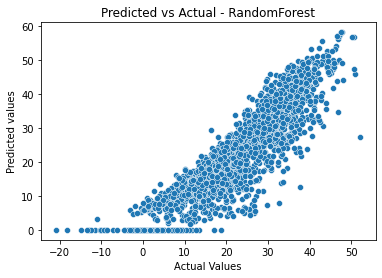

In [117]:
#visualizing the predictions
sns.scatterplot(x=y_pred_test_ridge,y=y_test)
plt.title('Predicted vs Actual - RandomForest')
plt.ylabel('Predicted values')
plt.xlabel('Actual Values')

# Decision Tree

In [118]:
# building the model
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100)
# fitting training data to the model
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [119]:
# predict for train data
y_pred_train_d = decision_regressor.predict(X_train)

# predict for test data
y_pred_test_d = decision_regressor.predict(X_test)

In [120]:
# calculating model score
print("Model Score:",decision_regressor.score(X_train,y_train))

# calculating MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

# calculating RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


# calculating MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)

# calculating r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_d)

Model Score: 0.6580092168049512
MSE : 52.663392847142156
RMSE : 7.25695479158732
MAE : 5.409999625155528
R2 : 0.6580092168049512
Adjusted R2 : 0.6505052173604287


In [121]:
# storing the train set metrics value into the train evaluation dataframe
Train_dict1={'Model':'Decision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
Training_df=Training_df.append(Train_dict1,ignore_index=True)

In [122]:
# calculating MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

# calculating RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


# calculating MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)


# calculating r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_d)

MSE : 56.05291303998085
RMSE : 7.486849340008176
MAE : 5.578691212511451
R2 : 0.6451592753077633
Adjusted R2 : 0.6373733210311363


In [123]:
# storing the test set metrics value into the test evaluation dataframe
Test_dict2={'Model':'Decision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
Test_df=Test_df.append(Test_dict2,ignore_index=True)

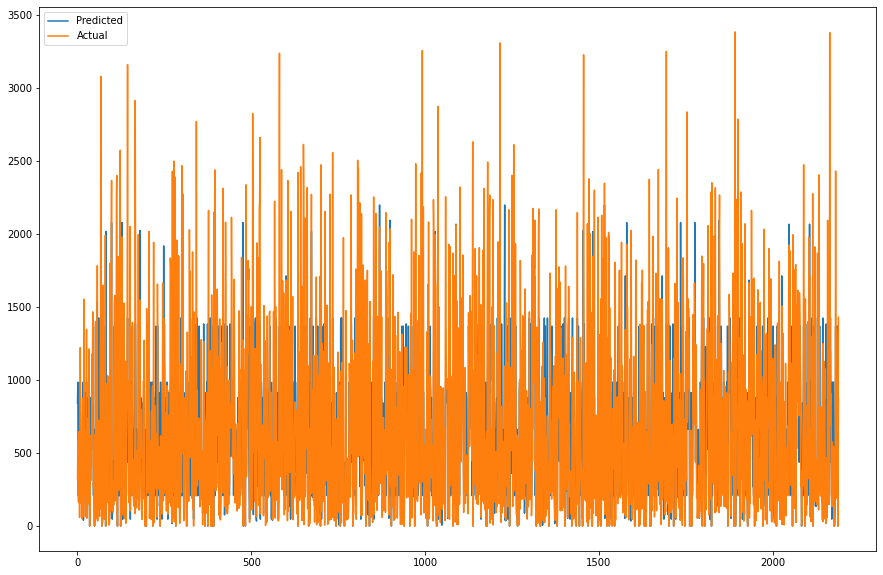

In [124]:
plt.figure(figsize=(15,10))
plt.plot(((y_pred_test_d)**2))
plt.plot((np.array((y_test)**2)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0, 'Actual Values')

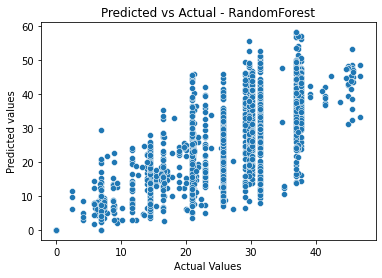

In [125]:
#visualizing the predictions
sns.scatterplot(x=y_pred_test_d,y=y_test)
plt.title('Predicted vs Actual - RandomForest')
plt.ylabel('Predicted values')
plt.xlabel('Actual Values')

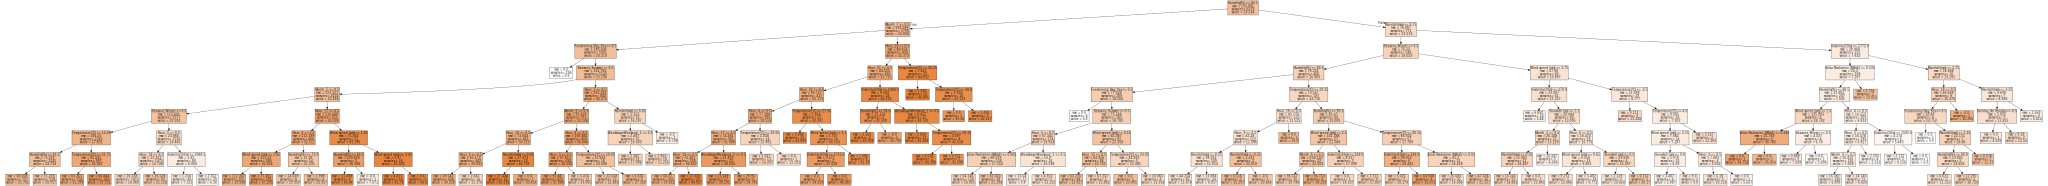

In [126]:
# DOT data
dot_data = tree.export_graphviz(decision_regressor, out_file=None, 
                                feature_names=X_train.columns,  
                                class_names='views',
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph.render

# Display graph
graph

In [127]:
Test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,4.474,33.275,5.768,0.772,0.77
1,Lasso regression,7.456,96.775,9.837,0.387,0.37
2,Ridge regression,4.410,33.277,5.769,0.789,0.78
3,Elastic net regression Test,5.874,59.451,7.710,0.624,0.62
4,Lasso regression Test with cross-validation,4.410,33.276,5.769,0.789,0.78
5,Ridge regression Test with cross-validation,4.413,33.291,5.770,0.789,0.78
6,Decision tree regression,5.579,56.053,7.487,0.645,0.64


# Random Forest 

In [128]:
# Create an instance of the RandomForestRegressor.
rf_model = RandomForestRegressor()

# fitting the train data in model.
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [129]:
# predict for train data.
y_pred_train_r = rf_model.predict(X_train)

# predict for test data.
y_pred_test_r = rf_model.predict(X_test)

In [130]:
# calculating model score.
print("Model Score:",rf_model.score(X_train,y_train))

# calculating MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

# calculating RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


# calculating MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


# calculating r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_rf )

Model Score: 0.989900369006672
MSE : 1.5552490322800743
RMSE : 1.2470962401836012
MAE : 0.7989335150280485
R2 : 0.989900369006672
Adjusted R2 : 0.9896787617906653


In [131]:
# storing the train set metrics value into the train evaluation dataframe
Train_dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
Training_df=Training_df.append(Train_dict1,ignore_index=True)

In [132]:
# calculating MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

# calculating RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


# calculating MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


# calculating r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)

# Calculating adjusted r2
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_rf )

MSE : 12.650209534674683
RMSE : 3.5567133050999042
MAE : 2.2144390059747314
R2 : 0.9199183543665095
Adjusted R2 : 0.9181611940748315


In [133]:
# storing the test set metrics value in the test evaluation dataframe.
Test_dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
Test_df=Test_df.append(Test_dict2,ignore_index=True)

In [134]:
# feature importances for random forest model
rf_model.feature_importances_

array([3.15368534e-01, 1.58667704e-01, 1.23234780e-02, 1.22072549e-02,
       3.25942753e-02, 3.29180421e-02, 1.39535913e-03, 4.75211664e-03,
       1.32219244e-02, 2.00809677e-02, 2.88199364e-02, 2.51175605e-02,
       7.79717520e-03, 4.15390756e-03, 1.30040931e-02, 1.02428240e-03,
       2.20529582e-03, 1.14402071e-03, 3.04828116e-04, 2.57791094e-04,
       3.86914838e-04, 1.44708196e-03, 3.60371076e-03, 1.05714729e-02,
       3.05472102e-02, 1.75786975e-02, 1.21644362e-02, 1.27804073e-02,
       9.61338155e-03, 3.82903346e-03, 4.32379080e-03, 8.46482676e-04,
       1.08799942e-02, 3.93780949e-03, 1.49409827e-01, 2.97567309e-04,
       3.81826603e-03, 1.33973802e-03, 1.66577838e-03, 2.43823397e-03,
       6.84724421e-04, 2.14216449e-03, 8.75771281e-04, 2.84719357e-03,
       4.38030462e-03, 8.23664999e-04, 1.94077958e-02])

In [135]:
# storing feature importances in a dataframe.
importances = rf_model.feature_importances_
importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}
importance_df = pd.DataFrame(importance_dict)

In [136]:
# rounding off the values.
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [137]:
# sort features according to their importance.
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature(°C),0.32
1,Humidity(%),0.16
34,Functioning Day_Yes,0.15
10,Hour_4,0.03
4,Solar Radiation (MJ/m2),0.03
5,Rainfall(mm),0.03
24,Hour_18,0.03
11,Hour_5,0.03
25,Hour_19,0.02
46,WeekdayorWeekend_1,0.02


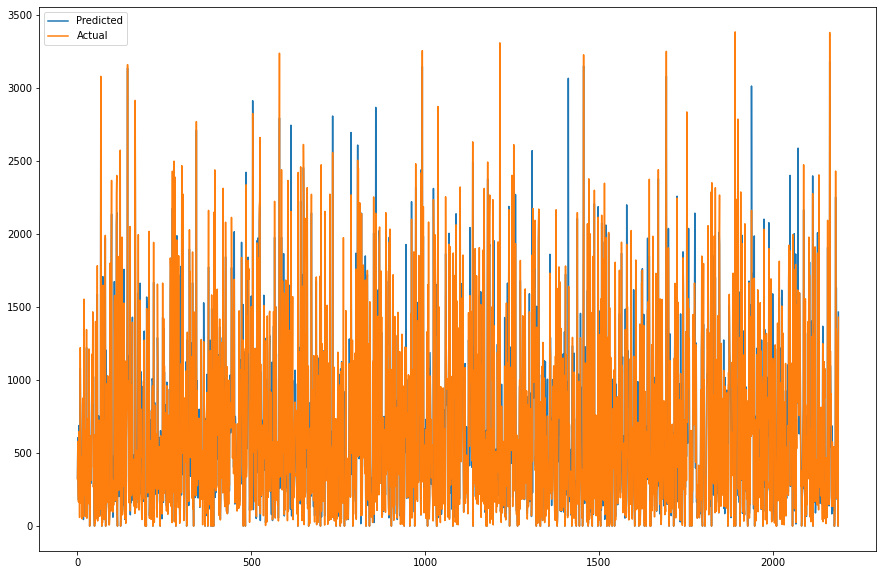

In [138]:
plt.figure(figsize=(15,10))
plt.plot(((y_pred_test_r)**2))
plt.plot((np.array((y_test)**2)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0, 'Actual Values')

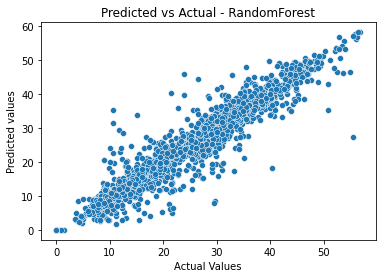

In [139]:
#visualizing the predictions
sns.scatterplot(x=y_pred_test_r,y=y_test)
plt.title('Predicted vs Actual - RandomForest')
plt.ylabel('Predicted values')
plt.xlabel('Actual Values')

In [140]:
Test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,4.474,33.275,5.768,0.772,0.77
1,Lasso regression,7.456,96.775,9.837,0.387,0.37
2,Ridge regression,4.410,33.277,5.769,0.789,0.78
3,Elastic net regression Test,5.874,59.451,7.710,0.624,0.62
4,Lasso regression Test with cross-validation,4.410,33.276,5.769,0.789,0.78
5,Ridge regression Test with cross-validation,4.413,33.291,5.770,0.789,0.78
6,Decision tree regression,5.579,56.053,7.487,0.645,0.64
7,Random forest regression,2.214,12.650,3.557,0.920,0.92


# Random Forest with Cross-validation

In [141]:
# Defining a parameter dictionary for grid search CV. This will be the set of parameters 
# and their values the grid search algorithm will apply and get the 
# best combination of these parameters for optimised and accurate results.

param_grid_cv = {
 'n_estimators': [200, 300],
 'max_depth': [8, 10, 12, 14],
}
 
param_grid_cv

{'n_estimators': [200, 300], 'max_depth': [8, 10, 12, 14]}

In [142]:
# Running the GridSearchCV algorithm on above parameter dictionary 
# with estimator as rf_model(random forest model) to get the 
# best combination of parameters for random forest algorithm.
CV_rfc = GridSearchCV(estimator = rf_model, param_grid = param_grid_cv, cv = 5)

# Fitting the training data into the model.
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [8, 10, 12, 14],
                         'n_estimators': [200, 300]})

In [143]:
CV_rfc.best_params_

{'max_depth': 14, 'n_estimators': 300}

In [144]:
# predict on train data.
y_pred_train_grid_cvr = CV_rfc.predict(X_train)

# predict on test data.
y_pred_test_grid_cvr = CV_rfc.predict(X_test)

In [145]:
# calculating model score on train data
print("Model Score:",CV_rfc.score(X_train,y_train))

# calculating MSE
MSE_rf = mean_squared_error(y_train, y_pred_train_grid_cvr)
print("MSE :",MSE_rf)

# calculating RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


# calculating MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_grid_cvr)
print("MAE :",MAE_rf)


# calculating r2
r2_rf= r2_score(y_train, y_pred_train_grid_cvr)
print("R2 :",r2_rf)

# calculating adjusted r2
Adjusted_R2_rf = (1-(1-r2_score(y_train, y_pred_train_grid_cvr))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_rf )

Model Score: 0.9337597450712908
MSE : 10.200381820278142
RMSE : 3.1938036602581166
MAE : 2.092073904815856
R2 : 0.9337597450712908
Adjusted R2 : 0.9323062940994657


In [146]:
# Storing metrics in a dictionary.
Train_dict1={'Model':'Random forest regression with gridSearchCV ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}

# adding the values to the train evaluation dataframe.
Training_df=Training_df.append(Train_dict1,ignore_index=True)

In [147]:
# calculating MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_grid_cvr)
print("MSE :",MSE_rf)

# calculating RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


# calculating MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_grid_cvr)
print("MAE :",MAE_rf)


# calculating r2
r2_rf= r2_score((y_test), (y_pred_test_grid_cvr))
print("R2 :",r2_rf)

# calculating adjusted r2
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_grid_cvr)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_rf)

MSE : 17.564273811499508
RMSE : 4.190975281661717
MAE : 2.7785425448306946
R2 : 0.8888100669537033
Adjusted R2 : 0.8863703251921833


In [148]:
# storing the test set metrics value into the test evaluation dataframe
Test_dict2={'Model':'Random forest regression with gridSearchCV',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
Test_df=Test_df.append(Test_dict2,ignore_index=True)

In [149]:
# feature importances for grid CV random forest model.
rf_model.feature_importances_

array([3.15368534e-01, 1.58667704e-01, 1.23234780e-02, 1.22072549e-02,
       3.25942753e-02, 3.29180421e-02, 1.39535913e-03, 4.75211664e-03,
       1.32219244e-02, 2.00809677e-02, 2.88199364e-02, 2.51175605e-02,
       7.79717520e-03, 4.15390756e-03, 1.30040931e-02, 1.02428240e-03,
       2.20529582e-03, 1.14402071e-03, 3.04828116e-04, 2.57791094e-04,
       3.86914838e-04, 1.44708196e-03, 3.60371076e-03, 1.05714729e-02,
       3.05472102e-02, 1.75786975e-02, 1.21644362e-02, 1.27804073e-02,
       9.61338155e-03, 3.82903346e-03, 4.32379080e-03, 8.46482676e-04,
       1.08799942e-02, 3.93780949e-03, 1.49409827e-01, 2.97567309e-04,
       3.81826603e-03, 1.33973802e-03, 1.66577838e-03, 2.43823397e-03,
       6.84724421e-04, 2.14216449e-03, 8.75771281e-04, 2.84719357e-03,
       4.38030462e-03, 8.23664999e-04, 1.94077958e-02])

In [150]:
# storing feature importances in a dataframe
importances = rf_model.feature_importances_
importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}
importance_df = pd.DataFrame(importance_dict)

In [151]:
# rounding off the values.
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [152]:
# sort features according to their importance.
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature(°C),0.32
1,Humidity(%),0.16
34,Functioning Day_Yes,0.15
10,Hour_4,0.03
4,Solar Radiation (MJ/m2),0.03
5,Rainfall(mm),0.03
24,Hour_18,0.03
11,Hour_5,0.03
25,Hour_19,0.02
46,WeekdayorWeekend_1,0.02


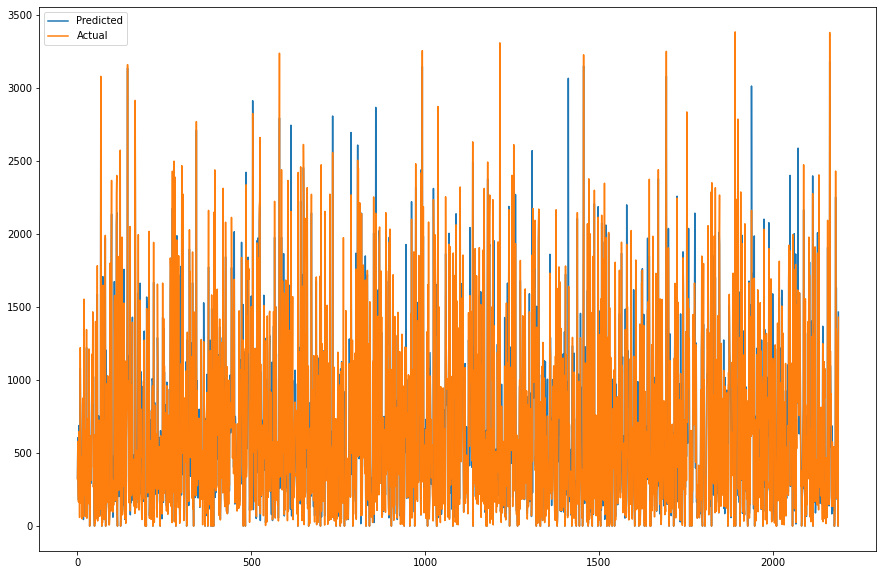

In [153]:
plt.figure(figsize=(15,10))
plt.plot(((y_pred_test_r)**2))
plt.plot((np.array((y_test)**2)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0, 'Actual Values')

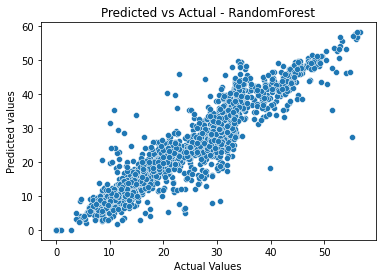

In [154]:
#visualizing the predictions
sns.scatterplot(x=y_pred_test_grid_cvr,y=y_test)
plt.title('Predicted vs Actual - RandomForest')
plt.ylabel('Predicted values')
plt.xlabel('Actual Values')

# XGBOOST

In [155]:
from xgboost import XGBRegressor
# making a model object of XGB regressor.
model =  XGBRegressor()

# fitting train data in XGB model. 
model.fit(X_train, y_train)

[03:04:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [156]:
# predict on train data.
y_pred_train_xgb = model.predict(X_train)

# predict on test data.
y_pred_test_xgb = model.predict(X_test)

In [157]:
# calculating model score on train data.
print("Model Score:", model.score(X_train,y_train))

# calculating MSE
MSE_xgb= mean_squared_error(y_train, y_pred_train_xgb)
print("MSE :", MSE_xgb)

# calculating RMSE
RMSE_xgb=np.sqrt(MSE_xgb)
print("RMSE :", RMSE_xgb)


# calculating MAE
MAE_xgb= mean_absolute_error(y_train, y_pred_train_xgb)
print("MAE :", MAE_xgb)

# calculating r2
r2_xgb= r2_score(y_train, y_pred_train_xgb)
print("R2 :", r2_xgb)

# calculating adjusted r2
Adjusted_R2_xgb=(1-(1-r2_score(y_train, y_pred_train_xgb))*((X_test.shape[0]-1)/(X_test.shape[0] - X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_xgb )

Model Score: 0.8770052413903169
MSE : 18.94004636700085
RMSE : 4.352016356472118
MAE : 3.2880211940664967
R2 : 0.8770052413903169
Adjusted R2 : 0.87430647684566


In [158]:
# storing the train matrics in the train evaluation dataframe
Train_dict1={'Model':'XGBoost Regression ',
       'MAE':round((MAE_xgb),3),
       'MSE':round((MSE_xgb),3),
       'RMSE':round((RMSE_xgb),3),
       'R2_score':round((r2_xgb),3),
       'Adjusted R2':round((Adjusted_R2_xgb),2)
      }
Training_df=Training_df.append(Train_dict1,ignore_index=True)

In [159]:
# calculating MSE
MSE_xgb= mean_squared_error(y_test, y_pred_test_xgb)
print("MSE :",MSE_xgb)

# calculating RMSE
RMSE_xgb=np.sqrt(MSE_xgb)
print("RMSE :",RMSE_xgb)


# calculating MAE
MAE_xgb= mean_absolute_error(y_test, y_pred_test_xgb)
print("MAE :",MAE_xgb)

# calculating r2
r2_xgb= r2_score((y_test), (y_pred_test_xgb))
print("R2 :",r2_xgb)

# calculating adjusted r2
Adjusted_R2_xgb=(1-(1-r2_score((y_test), (y_pred_test_xgb)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_xgb )

MSE : 21.639539065193013
RMSE : 4.651831796743409
MAE : 3.5084702656323183
R2 : 0.8630117632169776
Adjusted R2 : 0.8600059522324761


In [160]:
# storing the test matrics in the test evaluation dataframe
Test_dict2={'Model':'XGBoost regression ',
       'MAE':round((MAE_xgb),3),
       'MSE':round((MSE_xgb),3),
       'RMSE':round((RMSE_xgb),3),
       'R2_score':round((r2_xgb),3),
       'Adjusted R2':round((Adjusted_R2_xgb),2)
      }
Test_df=Test_df.append(Test_dict2,ignore_index=True)

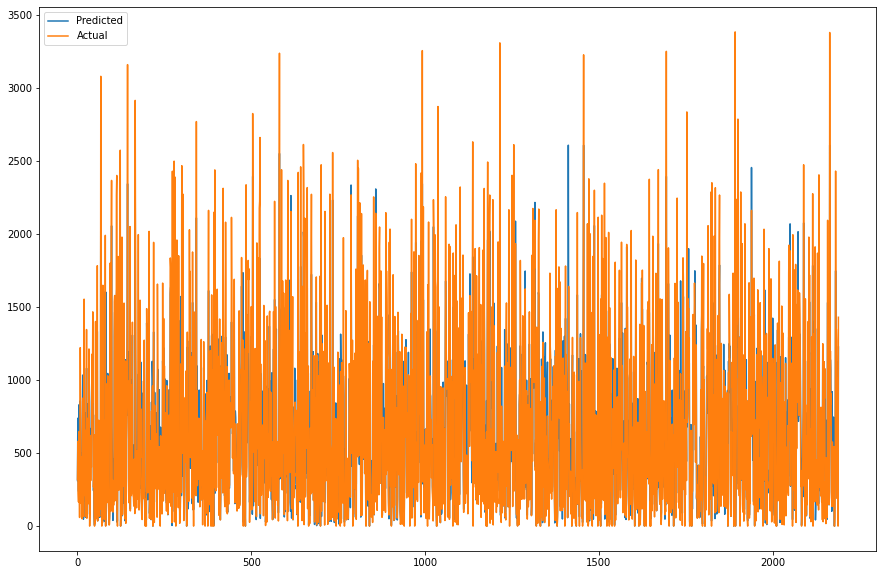

In [161]:
plt.figure(figsize=(15,10))
plt.plot(((y_pred_test_xgb)**2))
plt.plot((np.array((y_test)**2)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0, 'Actual Values')

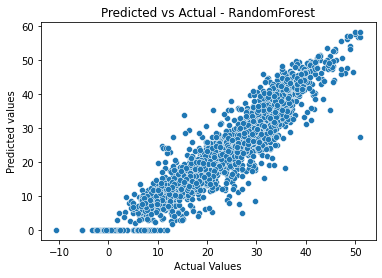

In [162]:
#visualizing the predictions
sns.scatterplot(x=y_pred_test_xgb,y=y_test)
plt.title('Predicted vs Actual - RandomForest')
plt.ylabel('Predicted values')
plt.xlabel('Actual Values')

In [163]:
Test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,4.474,33.275,5.768,0.772,0.77
1,Lasso regression,7.456,96.775,9.837,0.387,0.37
2,Ridge regression,4.410,33.277,5.769,0.789,0.78
3,Elastic net regression Test,5.874,59.451,7.710,0.624,0.62
4,Lasso regression Test with cross-validation,4.410,33.276,5.769,0.789,0.78
5,Ridge regression Test with cross-validation,4.413,33.291,5.770,0.789,0.78
6,Decision tree regression,5.579,56.053,7.487,0.645,0.64
7,Random forest regression,2.214,12.650,3.557,0.920,0.92
8,Random forest regression with gridSearchCV,2.779,17.564,4.191,0.889,0.89
9,XGBoost regression,3.508,21.640,4.652,0.863,0.86
